In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Data

In [2]:
seed = 1
N = 100
r_high = 5
rmin,rmax = -r_high, r_high
MAX_ITERATION = 500

In [3]:
from kerasy.utils.data_generator import generateWholeCakes
from kerasy.ML.svm import BaseSVM

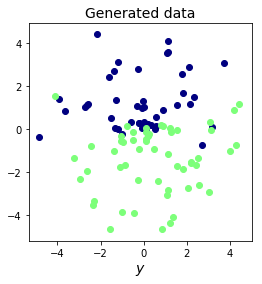

In [4]:
train_x, train_y = generateWholeCakes(2, N, r_high=r_high, seed=seed, same=False, plot=True, figsize=(4,4))

In [5]:
train_y = BaseSVM.formatting_y(train_y)

Convert 0 to -1 to suit for the SVM train data format.
Convert 1 to  1 to suit for the SVM train data format.


## hard SVM

In [6]:
from kerasy.ML.svm import hardSVC

In [7]:
kernels = [
    "linear","polynomial","gaussian",
    "sigmoid","laplacian","inverse_multiquadric"
]

In [8]:
X,Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

kernel: linear
239/500 [#########-----------]  47.80% - 82.510s  Rate of Support Vector = 24.0%

/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/svm.py:169: RuntimeWarning: invalid value encountered in double_scalars
  expected_step_size_rank = [abs(self.y(self.x_train[j]) - yi) if not self.isZero(self.a[j]) else 0 for j in range(self.N)]
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/svm.py:184: RuntimeWarning: invalid value encountered in double_scalars
  numerator = 1-ti*tj+ti*(yj-yi)
/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/ML/svm.py:55: RuntimeWarning: invalid value encountered in less
  self.isZero = lambda x:abs(x)<zero_eps


240/500 [#########-----------]  48.00% - 83.892s  Rate of Support Vector = 90.0%

KeyboardInterrupt: 

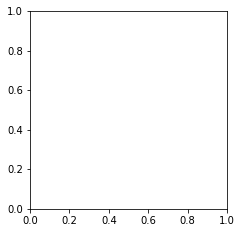

In [11]:
n_fig = len(kernels)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,kernel in enumerate(kernels):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"kernel: {kernel}")
    model = hardSVC(kernel=kernel)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"kernel: {kernel}\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
plt.tight_layout()
plt.show()

In [13]:
model.

nan

## Soft SVM

In [ ]:
from kerasy.ML.svm import SVC

In [ ]:
params = [
    (1e-2,1e-2),(1e-2,1e0),(1e-2,1e2),
    (1e1, 1e-2),(1e1, 1e0),(1e1, 1e2),
    (1e4, 1e-2),(1e4, 1e0),(1e4, 1e2),
]

In [ ]:
n_fig = len(params)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,(C,sigma) in enumerate(params):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"C={C}, sigma={sigma}")
    model = SVC(kernel="gaussian",C=C,sigma=sigma)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"gaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
plt.tight_layout()
plt.show()

## Multiple SVM (Soft)

In [ ]:
C,sigma = (1e1, 1e-2)

In [ ]:
from kerasy.ML.svm import MultipleSVM

In [ ]:
train_x, train_y = generateWholeCakes(4, N, same=False, plot=True, seed=seed, figsize=(4,4))

In [ ]:
model = MultipleSVM(kernel="gaussian", C=C, sigma=sigma)
model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y)

plt.figure(figsize=(6,6))
plt.pcolor(X, Y, Z, alpha=0.3)
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, s=100)
plt.title(f"one-versus-the-rest\ngaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
plt.xlim(rmin,rmax), plt.ylim(rmin,rmax)
plt.show()